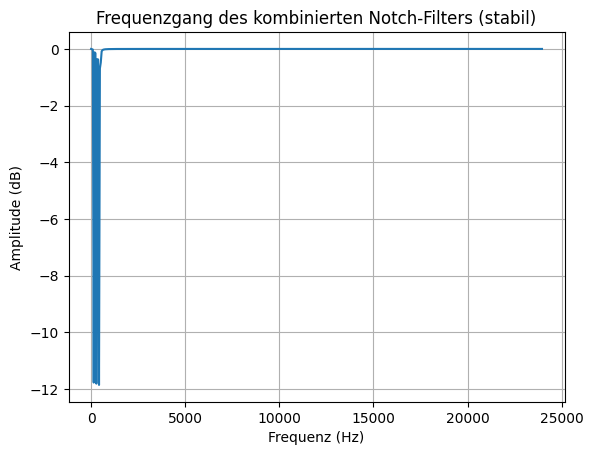

In [4]:
from scipy.signal import iirnotch, sosfreqz, tf2sos
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate und gewünschte Notch-Frequenzen
sample_rate = 48000
notch_freqs = [70, 140, 210, 280, 350, 420, 490]
quality_factor = 30  # Q-Faktor

# Erstelle eine Liste von Second-Order Sections (SOS)
sos_list = []
for freq in notch_freqs:
    # Berechne die Notch-Filter-Koeffizienten (b, a)
    b, a = iirnotch(w0=freq / (sample_rate / 2), Q=quality_factor)
    # Konvertiere in SOS-Darstellung
    sos = tf2sos(b, a)
    sos_list.append(sos)

# Kombiniere alle Second-Order Sections
sos_combined = np.vstack(sos_list)

# Frequenzgang berechnen
w, h = sosfreqz(sos_combined, fs=sample_rate)

# Frequenzgang plotten
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("Frequenzgang des kombinierten Notch-Filters (stabil)")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.show()
